# Neural Networks for Handwritten Digit Recognition, Multiclass 

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Neural Networks](#2)
  - [ 3.1 Problem Statement](#3.1)
  - [ 3.2 Dataset](#3.2)
  - [ 3.3 Model representation](#3.3)
  - [ 3.4 Tensorflow Model Implementation](#3.4)
 

## <a name="1"></a>
## 1 - Packages 

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

<a name="3"></a>
## 3 - Neural Networks

<a name="3.1"></a>
### 3.1 Problem Statement
The objective of this project is to develop a neural network that can accurately recognize handwritten digits ranging from 0 to 9 through multiclass classification. This system aims to automate the process of digit recognition, which is crucial in various applications such as postal code recognition on mail envelopes and amount recognition on bank checks. The neural network will be trained on a dataset of handwritten digits, and the goal is to achieve a high level of accuracy in predicting the correct digit when presented with a new handwritten input. The success of this project will result in an efficient and reliable system for digit recognition in various domains.

<a name="3.2"></a>
### 3.2 Dataset

- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

<sub> This is a subset of the MNIST handwritten digit dataset 
(http://yann.lecun.com/exdb/mnist/)</sub>    

In [59]:
def load_data():
    X = np.load("new_X.npy")
    y = np.load("new_y.npy")
   
    return X, y

In [60]:
# load dataset
X, y = load_data()

#### 3.2.1 View the variables

In [61]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [62]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [63]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 4.2.3 Visualizing the Data

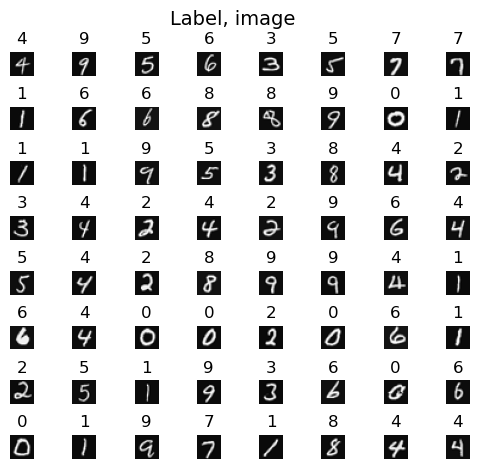

In [64]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

### <a name="3.3"></a>
### 3.3 Model representation
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
     - Since the images are of size $20\times20$, this gives us $400$ inputs 

#### <a name="3.4"></a>
### 3.4 Tensorflow Model Implementation


In [65]:
tf.random.set_seed(1234) 
model = Sequential(
    [               
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3") 
    ], name = "my_model" 
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [66]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [67]:
[layer1, layer2, layer3] = model.layers

In [68]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [69]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 3ms/step - loss: 1.4937
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5717
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3340
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2239
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2120
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1923
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1806
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1723
Epoch 13/40
157/157 [====

#### Prediction 

In [70]:
image_of_two = X[1015]


prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 85ms/step
 predicting a Two: 
[[ -5.010682    3.0936854   6.248148    0.3363677 -10.078408   -4.843831
   -3.4271195   1.2901808  -2.4489396  -5.408094 ]]
 Largest Prediction index: 2


In [71]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.2247940e-05 4.0527061e-02 9.4997197e-01 2.5719185e-03 7.7121797e-08
  1.4471898e-05 5.9675443e-05 6.6756406e-03 1.5871346e-04 8.2313118e-06]]
Total of predictions: 1.000


In [72]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2
